# step :1 Import library

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat



# Step 2 Read Dataset

In [4]:
df=pd.read_csv("Titanic-Dataset.csv")

In [5]:
# head
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# tail
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Step 3-Sanity check of data(Missing value)

In [7]:
#shape
df.shape

(891, 12)

In [8]:
#info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
# find missing value
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
#percentage of missing value
df.isnull().sum()/df.shape[0] *100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [14]:
#duplicate value
df.duplicated().sum()

0

In [21]:
# identifying garbage values
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*10)

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64
******************************
Sex
male      577
female    314
Name: count, dtype: int64
******************************
Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64
******************************
Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
        

In [31]:
#.Handle missing values using mean/median/imputation.

# Step :4 Exploratory Data Analysis(EDA)

In [33]:
 # Descriptive Statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [34]:
df.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


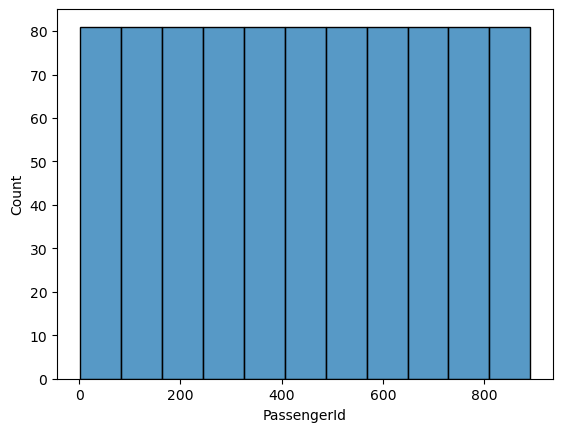

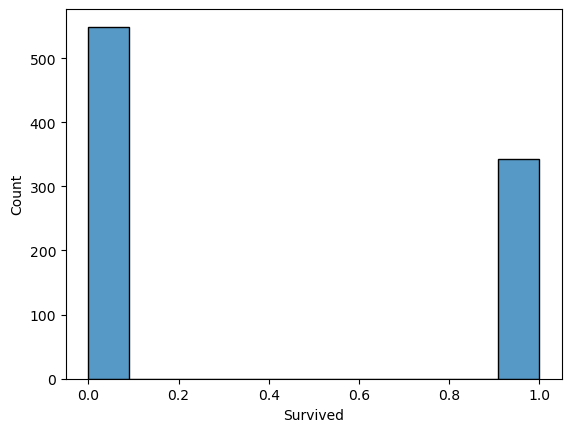

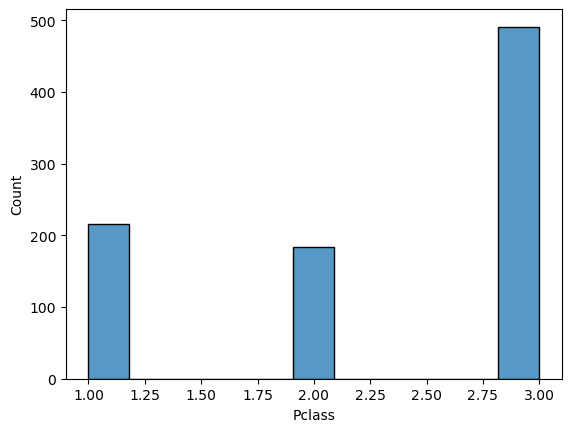

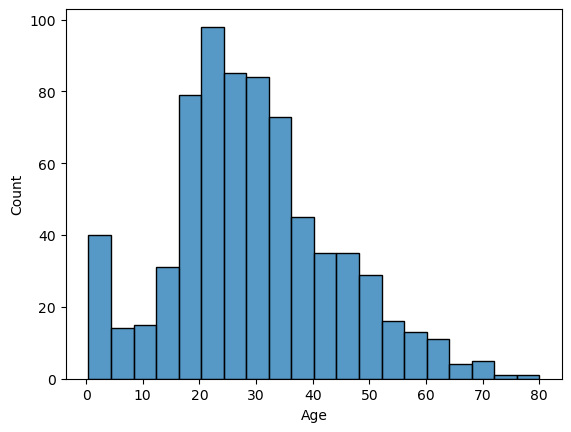

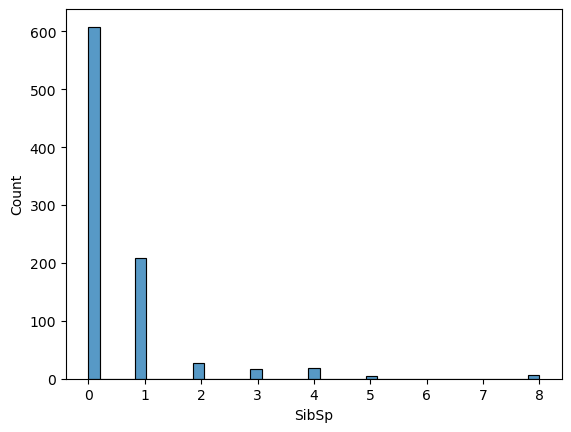

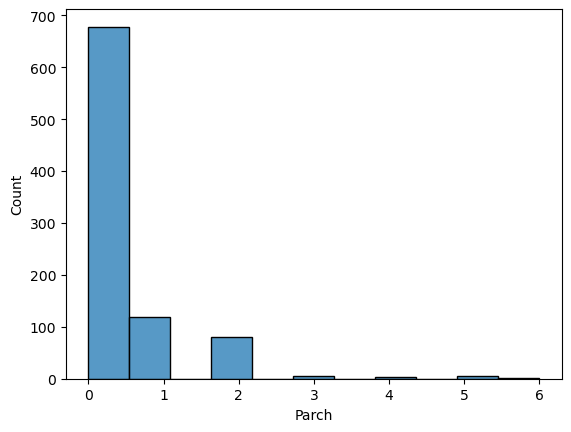

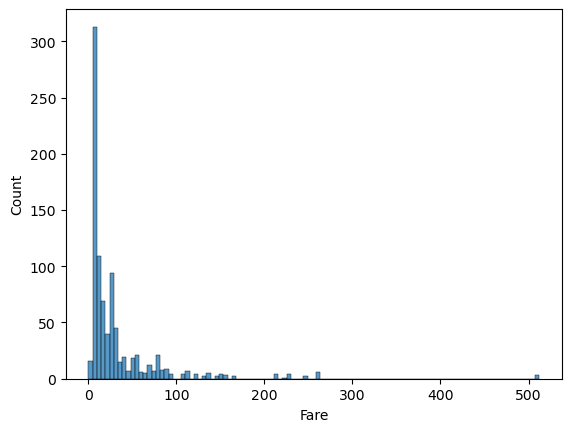

In [38]:
 #histagram to understand the distribution(Outliers)

for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i)
    plt.show()

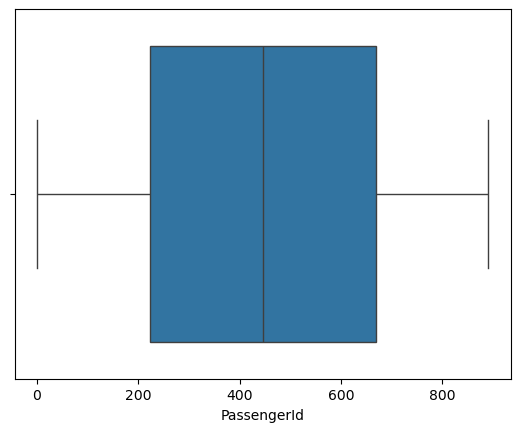

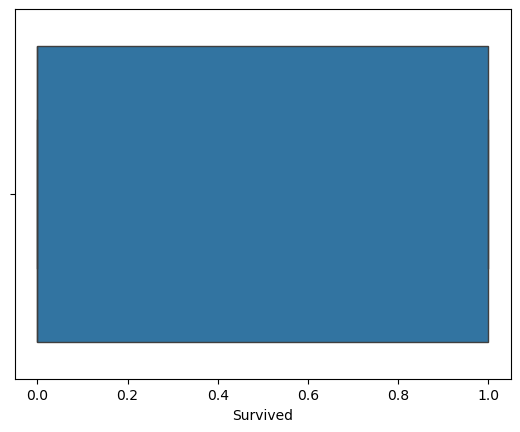

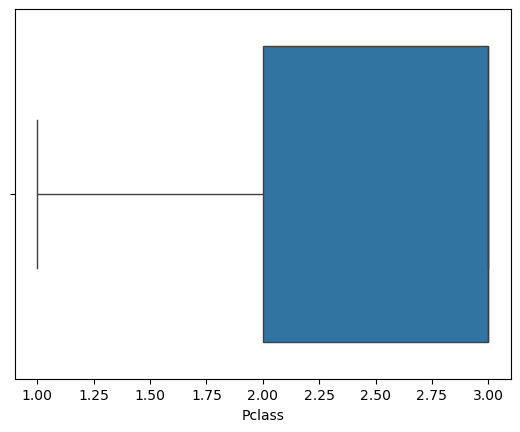

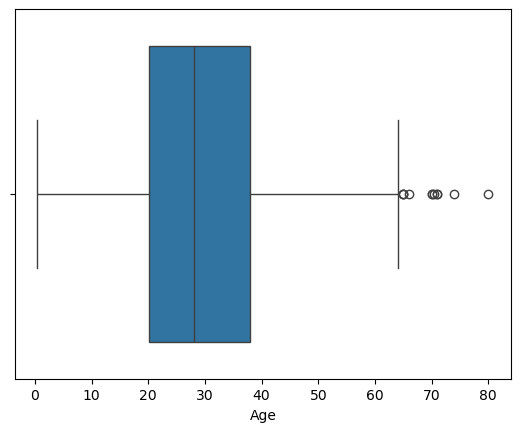

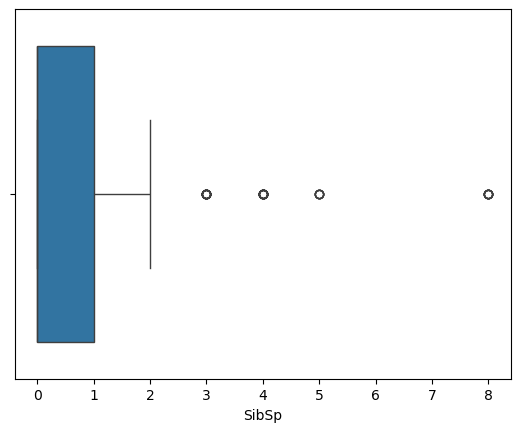

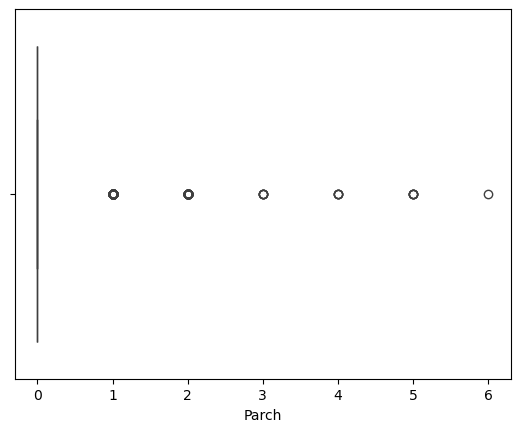

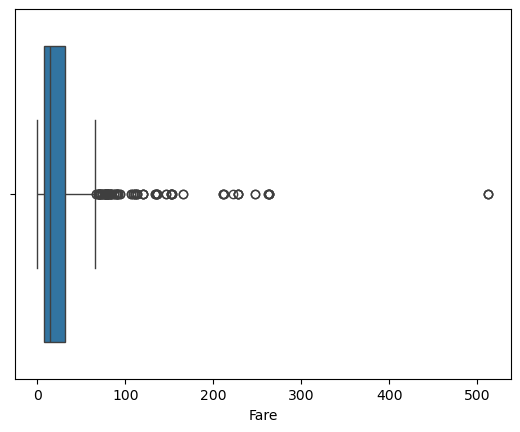

In [39]:
 #Boxplot to-identify outliers
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

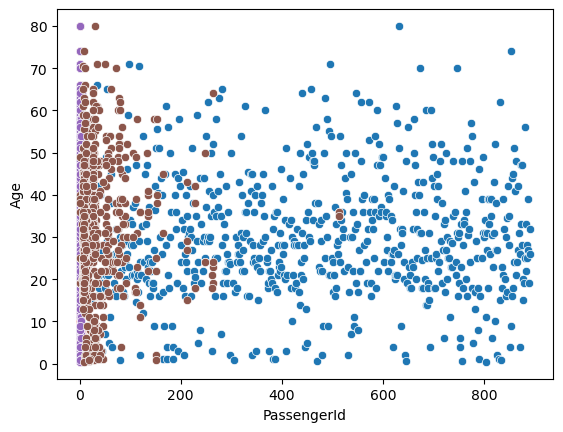

In [47]:
 # scatter plot  to understand the  relationship
for i in ['PassengerId', 'Survived', 'Pclass',  'SibSp', 'Parch', 'Fare'] :
    sns.scatterplot(data=df,x=i, y='Age')


In [44]:
df.select_dtypes(include="number").columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [48]:
 #correlation with heatmap to interpret the relation and multicolliniarity
s=df.select_dtypes(include="number").corr()


<Axes: >

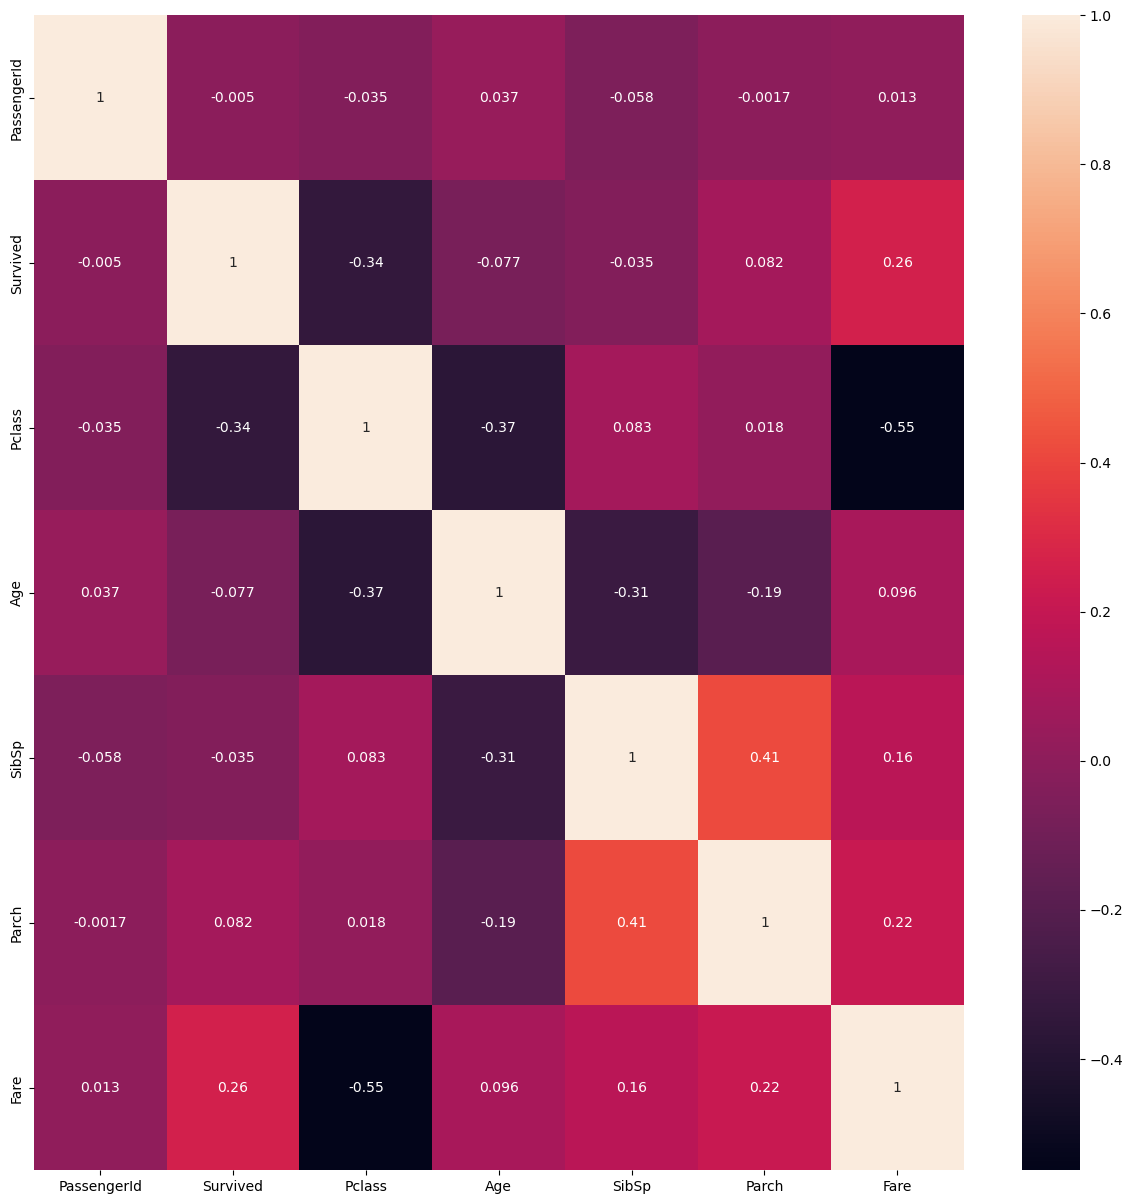

In [49]:
plt.figure(figsize=(15,15))
sns.heatmap(s,annot=True)


#  Steps 5 Missing value tratments

In [ ]:
#.Handle missing values using mean/median/imputation.


In [58]:
for i in ["Age","Fare","Cabin","Embarked"] :
    df[i].fillna(df[i].median,inplace=True)

In [59]:
from sklearn.impute import KNNImputer
impute=KNNImputer()

In [60]:
for i in df.select_dtypes(include="number").columns:
    df[i]=impute.fit_transform(df[[i]])

In [61]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

 #  steps 6 Outliers treatments

In [62]:
# decide whether to do outliers tratment or not ,if do how

In [63]:
 def wisker(col):
     q1,q3=np.percentile(col,[25,75])
     iqr=q3-q1
     lw=q1-1.5*iqr
     uw=q3+1.5*iqr
     return lw,uw

In [65]:
wisker(df["Fare"])

(-26.724, 65.6344)

In [69]:
for i in ['Survived', 'Pclass','SibSp' ]:
    lw,uw=wisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i])

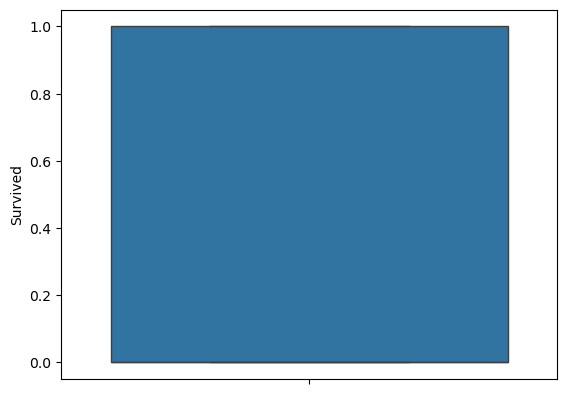

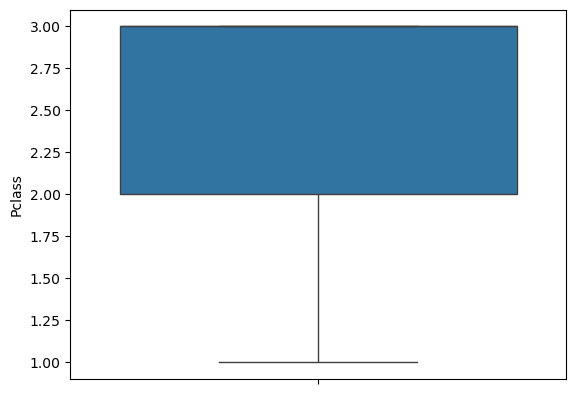

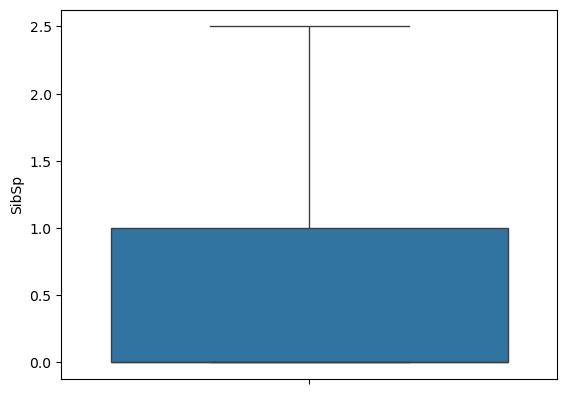

In [70]:
for i in ['Survived', 'Pclass','SibSp' ]:
    sns.boxplot(df[i])
    plt.show()

In [66]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Step 7 Encoding of data



In [102]:

from sklearn.preprocessing import LabelEncoder
df=pd.read_csv("Titanic-Dataset.csv")



# Label Encoding for 'Sex'
le = LabelEncoder()
df['Sex_encoded'] = le.fit_transform(df['Sex'])

# One-Hot Encoding for 'Sex' (alternative)
# df = pd.get_dummies(df, columns=['Sex'], prefix=['Sex'])

# Frequency Encoding for 'Name'
name_counts = df['Name'].value_counts()
df['Name_encoded'] = df['Name'].map(name_counts)

print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

# Normalization

In [108]:
df=pd.read_csv("Titanic-Dataset.csv")
from sklearn.preprocessing import StandardScaler

# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Standardize
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df)

     PassengerId  Survived    Pclass  \
0      -1.730108 -0.789272  0.827377   
1      -1.726220  1.266990 -1.566107   
2      -1.722332  1.266990  0.827377   
3      -1.718444  1.266990 -1.566107   
4      -1.714556 -0.789272  0.827377   
..           ...       ...       ...   
886     1.714556 -0.789272 -0.369365   
887     1.718444  1.266990 -1.566107   
888     1.722332 -0.789272  0.827377   
889     1.726220  1.266990 -1.566107   
890     1.730108 -0.789272  0.827377   

                                                  Name     Sex       Age  \
0                              Braund, Mr. Owen Harris    male -0.530377   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  0.571831   
2                               Heikkinen, Miss. Laina  female -0.254825   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  0.365167   
4                             Allen, Mr. William Henry    male  0.365167   
..                                                 ...     ... 